# Linear Regression using sklearn's Diabetes Data set

## Install Scikit-learn Library

In [47]:
%pip install scikit-learn


In [278]:
import pandas as pd

## Load Data
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#

In [281]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head(1)
# y = mX + b
# y = theta1.x1 + theta2.x2 + bias
# Features - all those values that act as input (X)
# Label - Is the output/outcome you are interested in (y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646


## Perform Data Analysis

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [324]:
# df.describe()
df.describe().map(lambda x: format(x, ".2f"))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


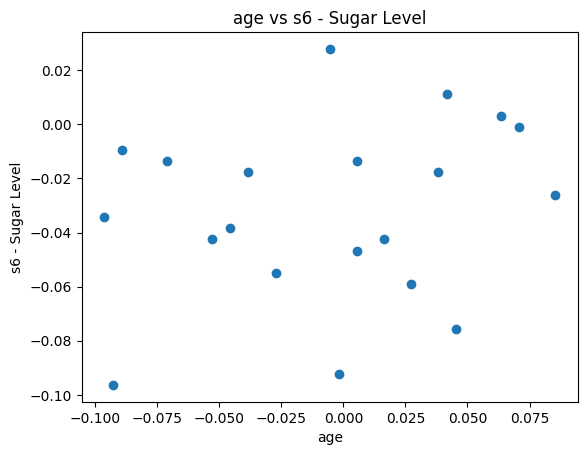

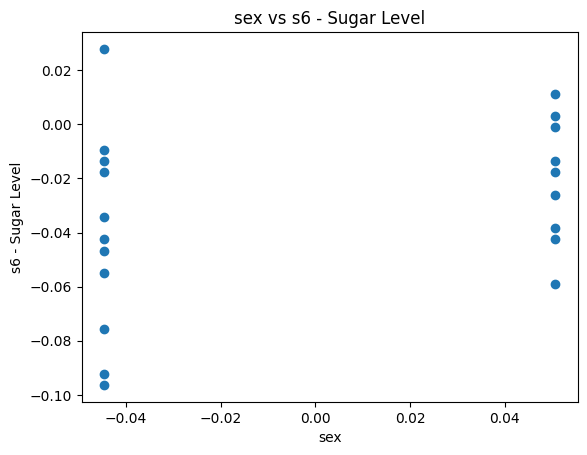

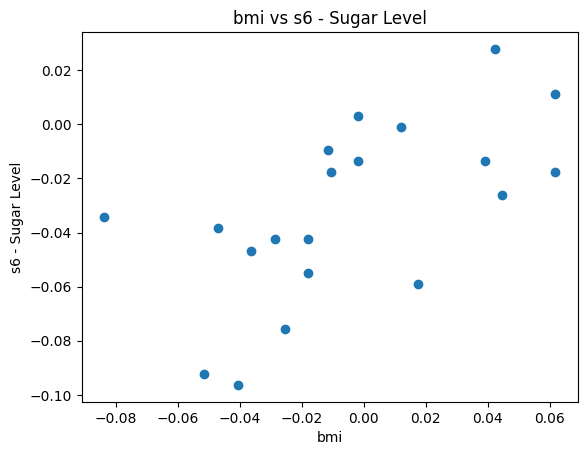

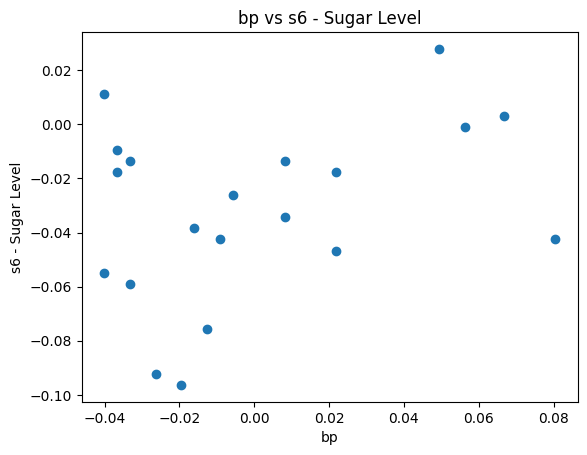

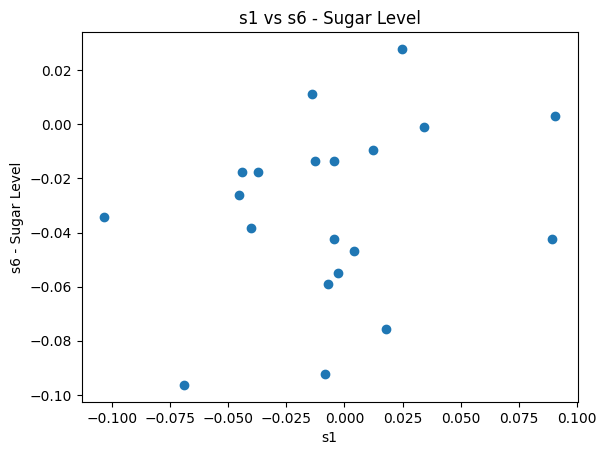

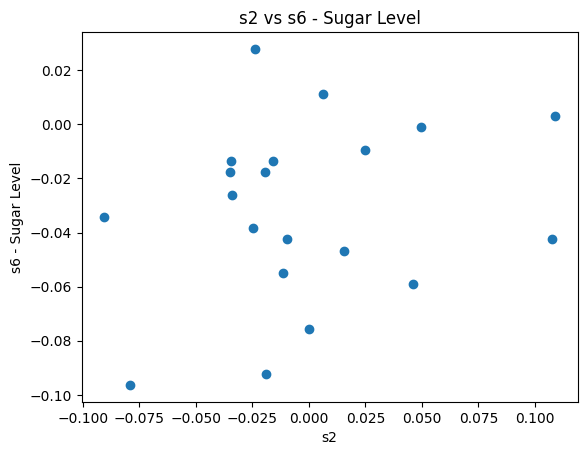

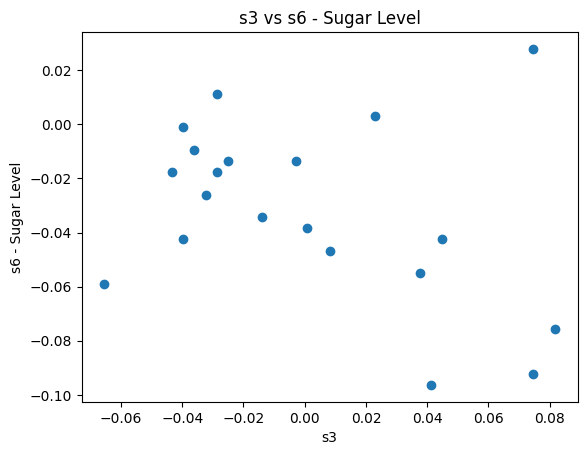

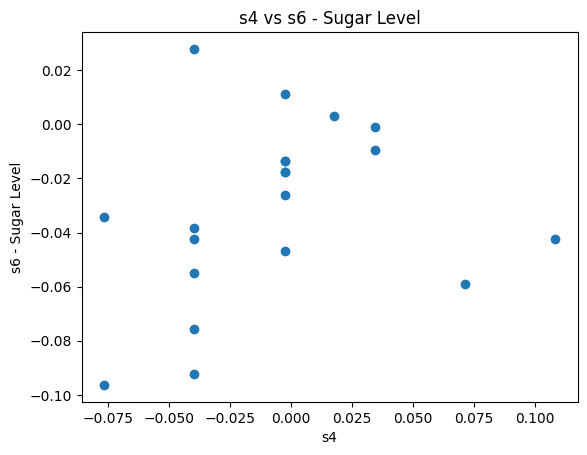

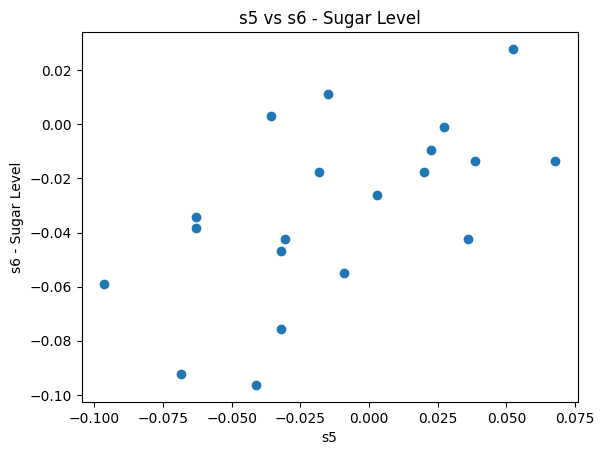

In [288]:
import matplotlib.pyplot as plt
for column in df.columns[:-1]:
    plt.scatter(df[column].iloc[:20], df['s6'].iloc[:20])

    plt.xlabel(column)
    plt.ylabel('s6 - Sugar Level')
    plt.title(f'{column} vs s6 - Sugar Level')
    plt.show()

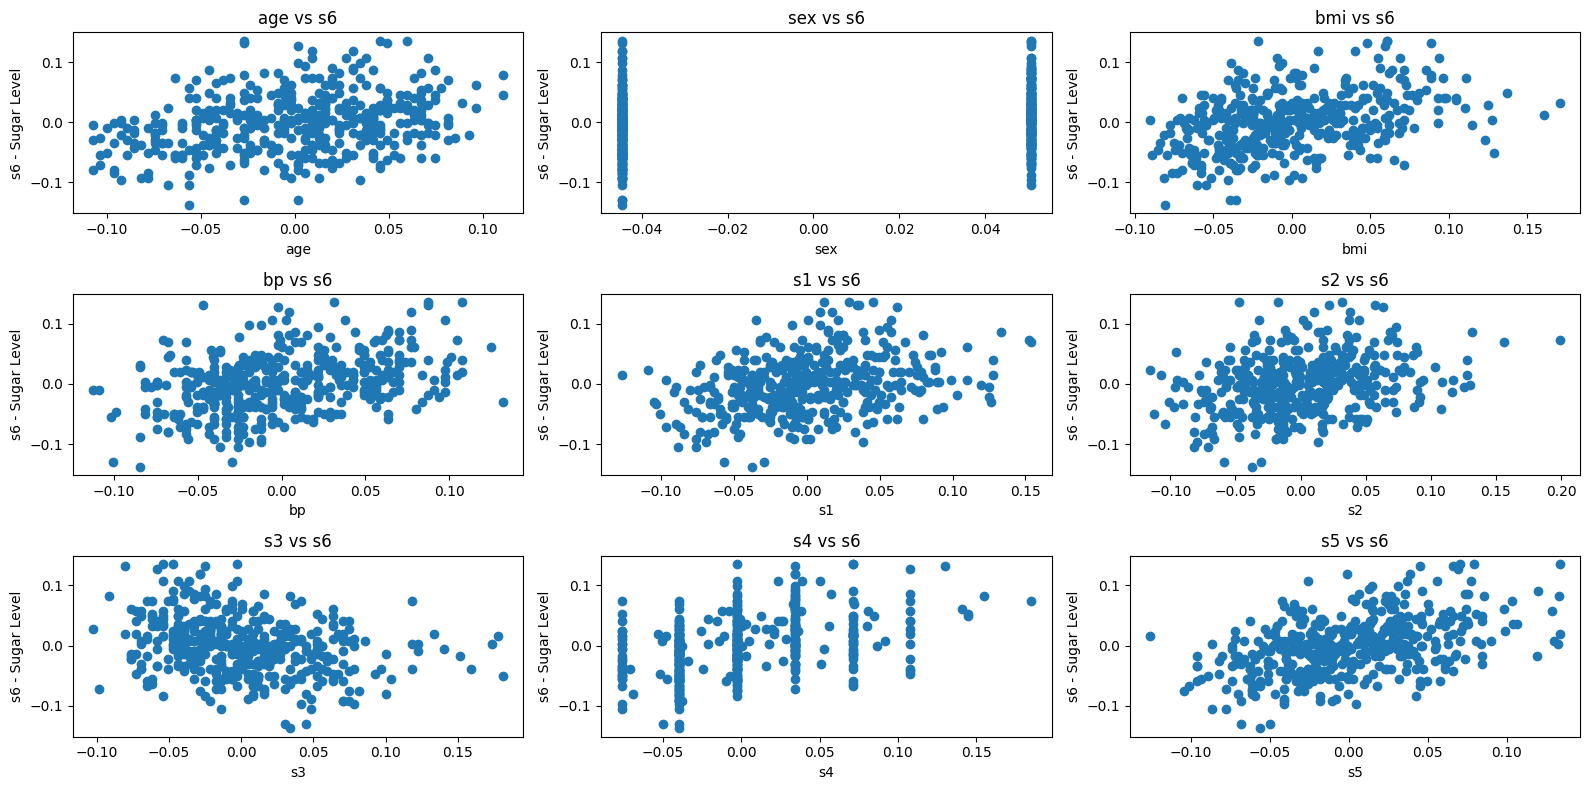

In [330]:
fig, axs = plt.subplots(3, 3, figsize=(16, 8))
axs = axs.flatten()  # Flatten 2D grid into 1D array for easy indexing

for i, column in enumerate(df.columns[:-1]):  # Exclude 'target'
    axs[i].scatter(df[column], df['s6'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('s6 - Sugar Level')
    axs[i].set_title(f'{column} vs s6')

plt.tight_layout()
plt.show()

In [290]:
corr = df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


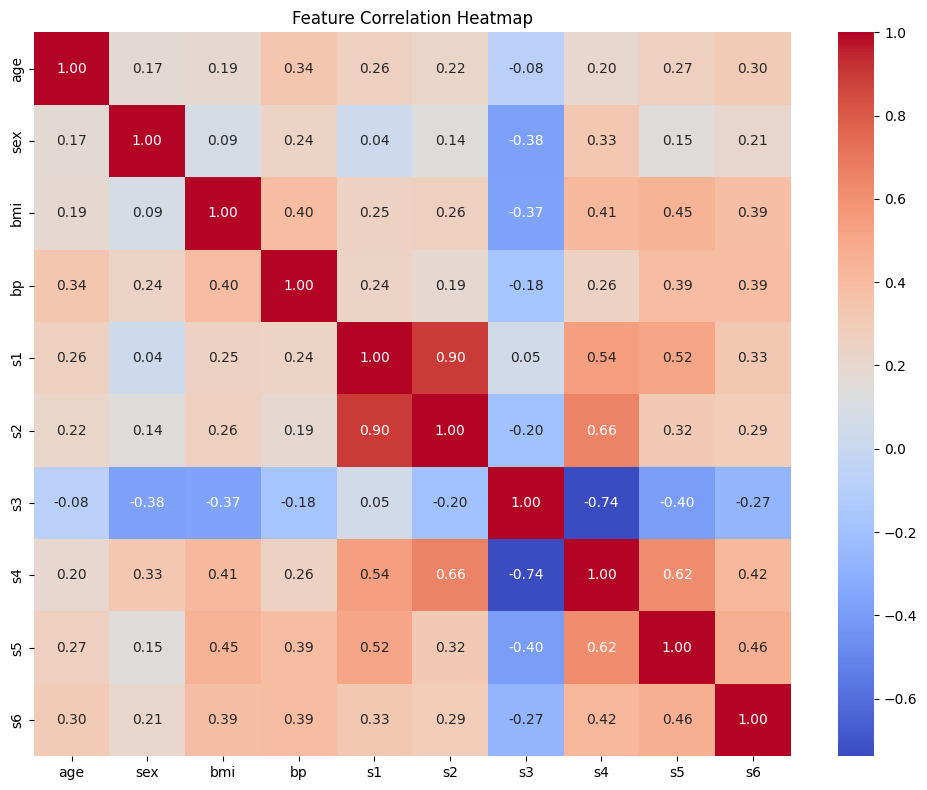

In [292]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()

plt.show()

## Create a model

In [297]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [299]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= 's6')
y = df['s6']
y.head()

0   -0.017646
1   -0.092204
2   -0.025930
3   -0.009362
4   -0.046641
Name: s6, dtype: float64

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [342]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [348]:
model.fit(X_train, y_train)

LinearRegression()

In [350]:
model.coef_

array([ 0.09587849,  0.06760761,  0.18631368,  0.16925368, -0.57480821,
        0.50397721,  0.3358859 ,  0.19266126,  0.38159394])

## Evaluate the model performance on Train Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [314]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

y_train_preds = model.predict(X_train)

mae_train = mean_absolute_error(y_train_preds, y_train)
mse_train = mean_squared_error(y_train_preds, y_train)
rmse_train = root_mean_squared_error(y_train_preds, y_train)

format(mae_train, "0.4f"), format(mse_train, "0.4f"), format(rmse_train, "0.4f")

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


('0.0314', '0.0015', '0.0390')

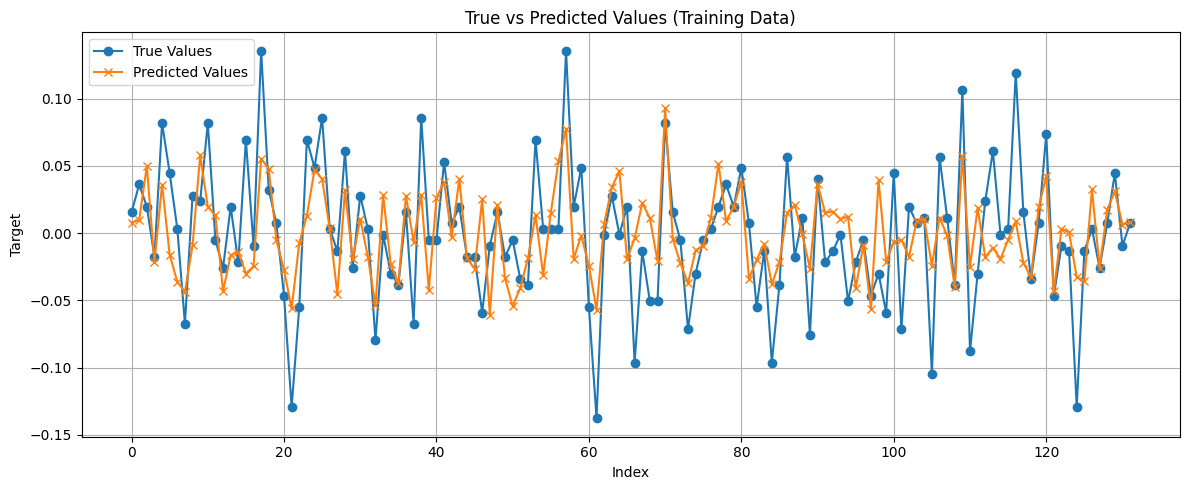

In [213]:
plt.figure(figsize=(12, 5))

# Plot true vs predicted values
plt.plot(y_train.values, label='True Values', marker='o')
plt.plot(y_train_preds, label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Predict

## Evaluate the model performance on Test Data(Mean Squared Error, Mean Absolute Error, Root Mean Squared Error)

In [246]:
y_test_preds = model.predict(X_test)

mse_test = mean_squared_error(y_test_preds, y_test)
rmse_test = root_mean_squared_error(y_test_preds, y_test)
mae_test = mean_absolute_error(y_test_preds, y_test)

format(mse_test, "0.4f"), format(rmse_test, "0.4f"), format(mae_test, "0.4f")

/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/amiteshsinha/amitesh_work/github_repo_2025/machine-learning-and-artificial-intelligence/ensemble_learning/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


('0.0017', '0.0408', '0.0328')

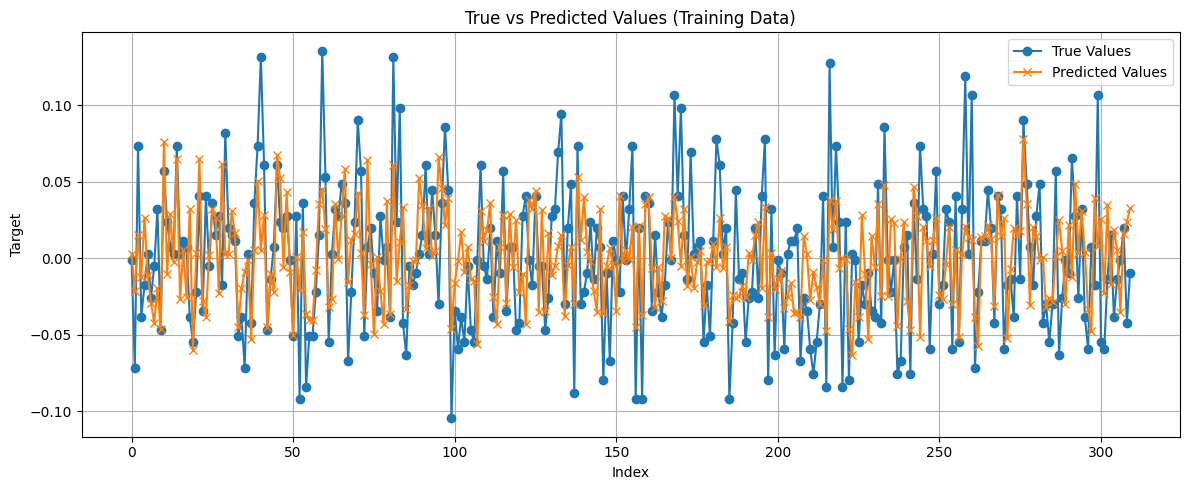

In [217]:
plt.figure(figsize=(12, 5))

# Plot true vs predicted values
plt.plot(y_test.values, label='True Values', marker='o')
plt.plot(y_test_preds, label='Predicted Values', marker='x')

plt.title('True vs Predicted Values (Training Data)')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare train and test error rates

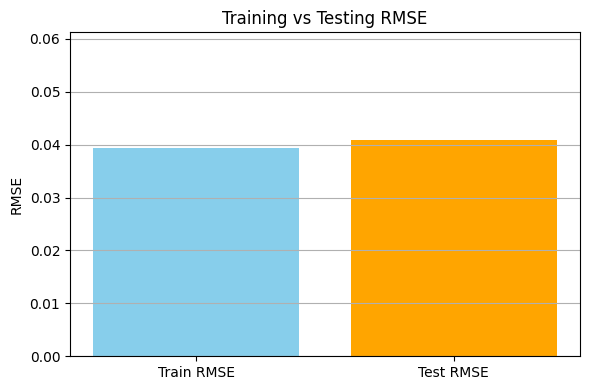

In [228]:
# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Train RMSE', 'Test RMSE'], [rmse_train, rmse_test], color=['skyblue', 'orange'])

plt.ylabel('RMSE')
plt.title('Training vs Testing RMSE')
plt.ylim(0, max(rmse_train, rmse_test) * 1.5)  # Add a little headroom
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusion
Since the training error (train RMSE) and testing error (test RMSE) are both low and closely aligned, it indicates that the model generalizes well to unseen data. This suggests the model is neither overfitting nor underfitting.


In [320]:
import sklearn
print(sklearn.__version__)

1.6.1
